# BoomBikes

<h3>
    Problem Statement:    
</h3>
<p>
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.    
</p>
<p>
    A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:
- Which vaeiables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands.
    
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 
</p>
<hr>
<h3>
    Business Goal:
</h3>
<p>
    We are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market.
</p>


## Import Python Libraries

In [1]:
# Importing Python Libraries
import numpy as np
import pandas as pd

# importing visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# importing machine learning libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

# Supress warnings
import warnings
warnings.filterwarnings('ignore')

# Formatting options for the notebook
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.expand_frame_repr', False)


## STEP 1:  Understanding and cleaning the data

In [2]:
# Reading the dataframe
# day.csv needs to be placed in the same folder where the notebook file is, else change the directory
bb_df = pd.read_csv('day.csv')
bb_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
# checking the shape of dataframe
bb_df.shape

(730, 16)

In [4]:
# statastical summary of the Data Frame
bb_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [5]:
# checking datatypes and null values of each column
bb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


- No null value in any column
- All the columns are either int or float except dteday
- Also, check for duplicate entries 
- We need to fix the column datatype of dtedate as Date

In [6]:
# dropping duplicate records and checking the shape to see if there was any duplicate record
bb_df.drop_duplicates(subset=None, inplace=True)
bb_df.shape

(730, 16)

Shape is retained, so no duplicate record

In [7]:
# converting the 'dteday' column to datetime format as per data dictionary
bb_df['dteday']= pd.to_datetime(bb_df['dteday'])
#checking datatype of dteday
print(bb_df.dtypes['dteday'])

datetime64[ns]


In [8]:
bb_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    int64         
 3   yr          730 non-null    int64         
 4   mnth        730 non-null    int64         
 5   holiday     730 non-null    int64         
 6   weekday     730 non-null    int64         
 7   workingday  730 non-null    int64         
 8   weathersit  730 non-null    int64         
 9   temp        730 non-null    float64       
 10  atemp       730 non-null    float64       
 11  hum         730 non-null    float64       
 12  windspeed   730 non-null    float64       
 13  casual      730 non-null    int64         
 14  registered  730 non-null    int64         
 15  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), floa

In [9]:
# Renaming few columns for better readability
bb_df = bb_df.rename(
    columns = {'yr':'year', 'mnth':'month', 'atemp':'feelslike_temp', 'hum':'humidity', 'cnt':'count'}) 


In [10]:
# Check unique values 
bb_df.nunique().sort_values()

year                2
holiday             2
workingday          2
weathersit          3
season              4
weekday             7
month              12
temp              498
humidity          594
casual            605
windspeed         649
registered        678
feelslike_temp    689
count             695
instant           730
dteday            730
dtype: int64

In [11]:
# checking the summary statistics of numerical columns
bb_df.describe()

,instant,season,year,month,holiday,weekday,workingday,weathersit,temp,feelslike_temp,humidity,windspeed,casual,registered,count
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


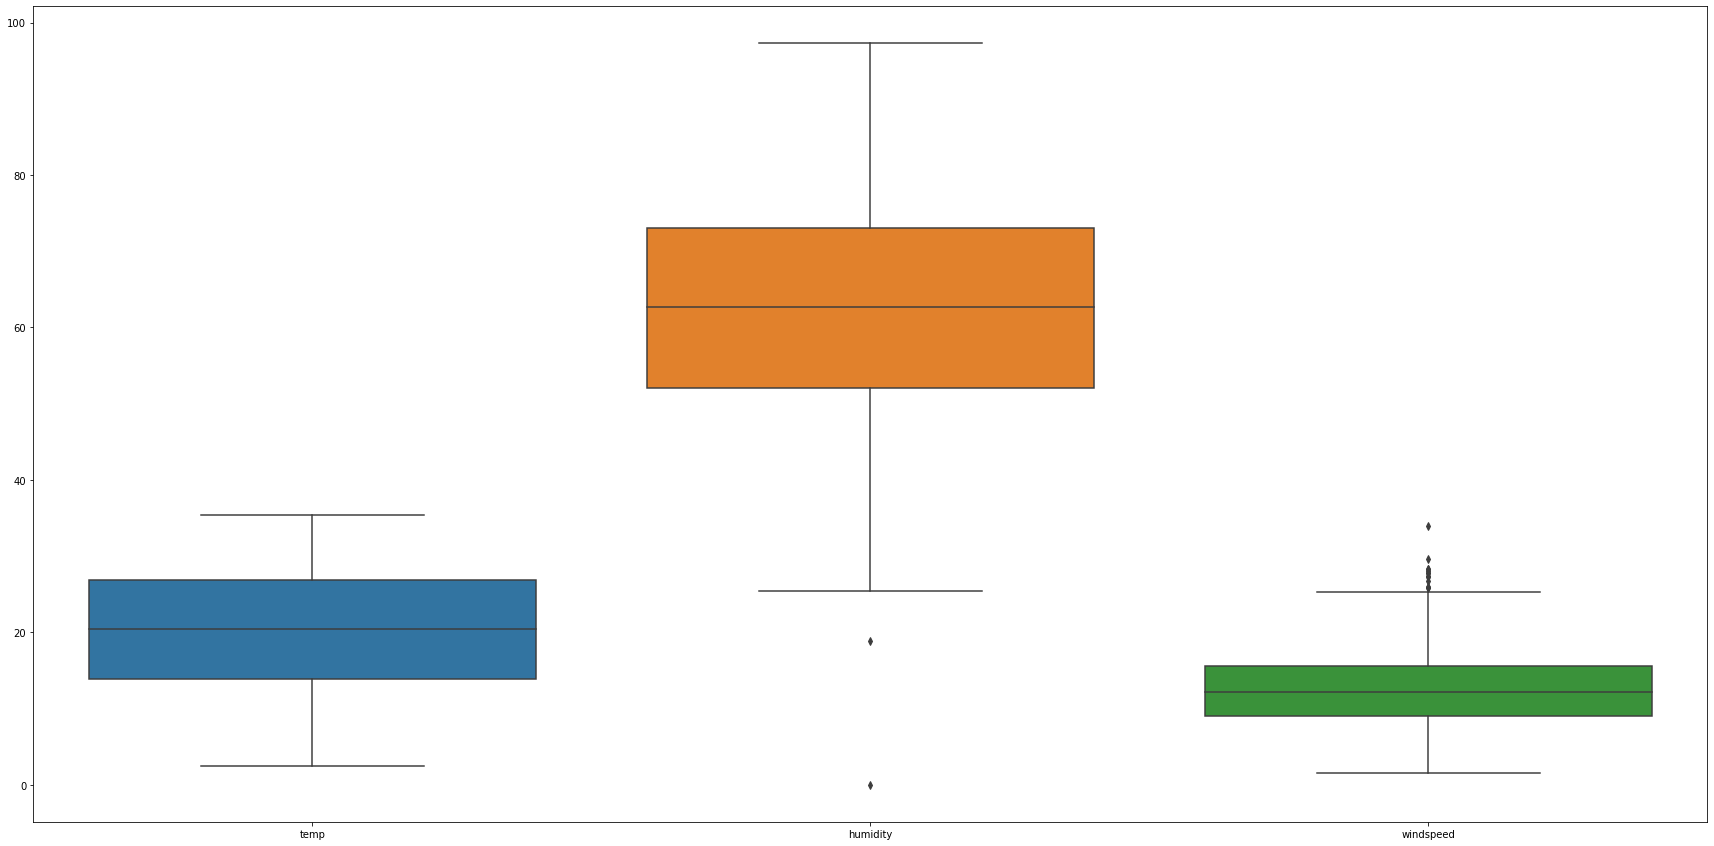

In [12]:
plt.figure(figsize = (30, 15))
sns.boxplot(data = bb_df[['temp', 'humidity', 'windspeed']])
plt.show()

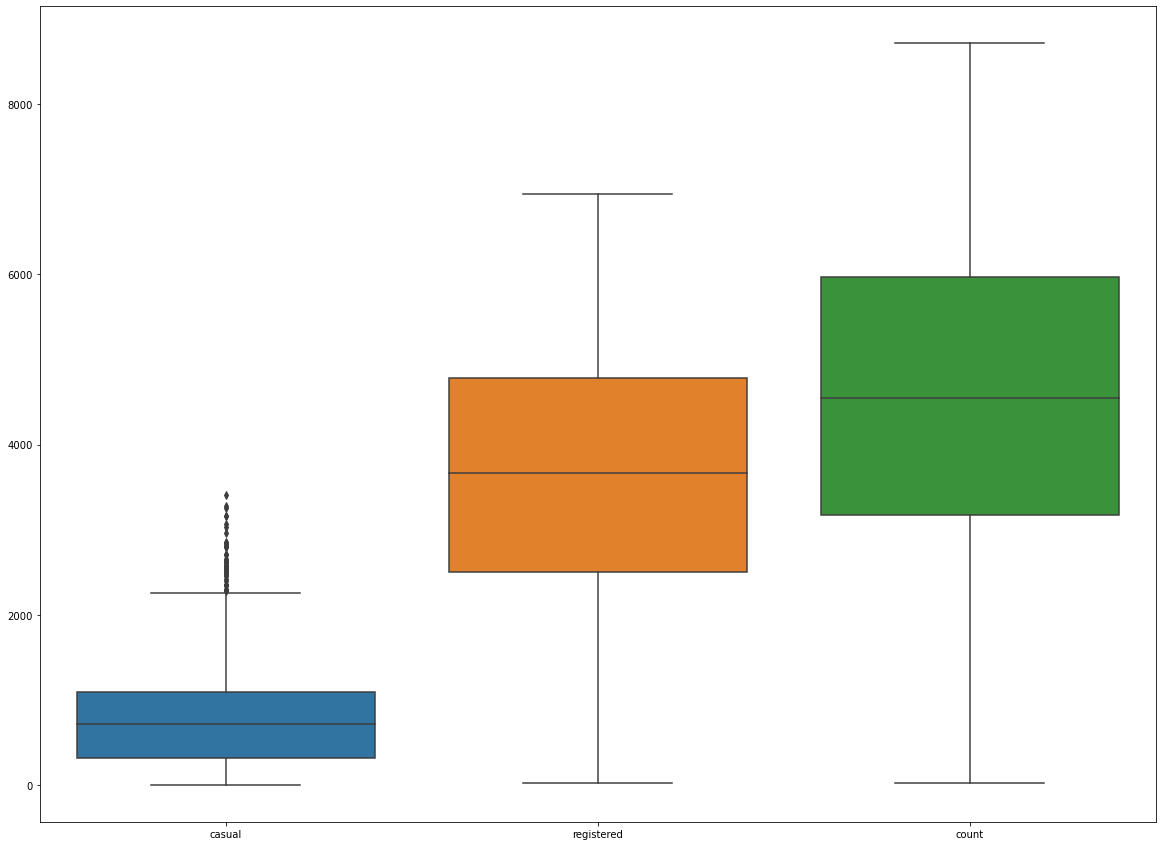

In [13]:
plt.figure(figsize = (20, 15))
sns.boxplot(data = bb_df[['casual', 'registered', 'count']])
plt.show()

In [14]:
# # Revalidate outliers using IQR for numeric predictor variables
# def outliers(x):
#     IQR = bb_df[x].quantile(0.75) - bb_df[x].quantile(0.25)
#     UQR = bb_df[x].quantile(0.75)+ IQR*1.5
#     LQR = bb_df[x].quantile(0.25)- IQR*1.5
#     per_outlier = round(((bb_df[x]<LQR).sum()+(bb_df[x]>UQR).sum())/len(bb_df[x])*100, 2)
#     return per_outlier
# print('Outliers % for temp: ', outliers('temp'))
# print('Outliers % for hum: ', outliers('humidity'))
# print('Outliers % for windspeed: ', outliers('windspeed'))
# print('Outliers % for casual: ', outliers('casual'))
# print('Outliers % for registered: ', outliers('registered'))
# print('Outliers % for windspeed: ', outliers('count'))


<div class="alert alert-box alert-info">
    <b>Observation:</b> 'causal' column has a high outliers but as per datasheet, this column might not be required going forward. So we will check this again. Other than this, no outlier removal required.
</div>

In [15]:
# season, year, month, weekday, weathersit - These categorical variables are mapped according to Data Dictionary

# Note: the date 1/1/2018 was assigned weekday as 6 which was a Monday. So, mapped accordingly 

bb_df['season']=bb_df['season'].map({1: 'spring', 2: 'summer',3:'fall', 4:'winter'})
bb_df['year']=bb_df['year'].map({0: '2018', 1: '2019'})
bb_df['month']=bb_df['month'].map({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'June', 7:'July', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'})
# in US, Sunday is considered to be the start of the week, we can map 0-6 to Sun-Sat 
# However, the dataset has weekday 6 for date 1/1/2018  which was a Monday. Skipping this mapping 
# bb_df['weekday']=bb_df['weekday'].map({0:'Sun', 1:'Mon', 2:'Tue', 3:'Wed', 4:'Thu', 5:'Fri', 6:'Sat'})
bb_df['weathersit']=bb_df['weathersit'].map({1: 'Clear-Partly Cloudy', 2:'Mist-Cloudy', 3:'Light Snow-Rain', 4:'Heavy Snow-Rain-Hail-Fog'})

bb_df.head()


,instant,dteday,season,year,month,holiday,weekday,workingday,weathersit,temp,feelslike_temp,humidity,windspeed,casual,registered,count
0,1,2018-01-01,spring,2018,Jan,0,6,0,Mist-Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-02-01,spring,2018,Jan,0,0,0,Mist-Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-03-01,spring,2018,Jan,0,1,1,Clear-Partly Cloudy,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-04-01,spring,2018,Jan,0,2,1,Clear-Partly Cloudy,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-05-01,spring,2018,Jan,0,3,1,Clear-Partly Cloudy,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [16]:
# As per data dictionary the target variable count is a sum of two independent variables 'casual' and 'registered'.
# So, lets validate this relationship before dropping these columns

bb_df['total_count'] = bb_df['casual'] + bb_df['registered']
bb_df[['total_count','count']].corr()

,total_count,count
total_count,1.0,1.0
count,1.0,1.0


In [17]:
# correlation being 1, dropping columns 'casual', 'registered' and 'total_count'

bb_df.drop(['casual','registered', 'total_count'],axis=1,inplace=True)
bb_df.head()

,instant,dteday,season,year,month,holiday,weekday,workingday,weathersit,temp,feelslike_temp,humidity,windspeed,count
0,1,2018-01-01,spring,2018,Jan,0,6,0,Mist-Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,2,2018-02-01,spring,2018,Jan,0,0,0,Mist-Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,3,2018-03-01,spring,2018,Jan,0,1,1,Clear-Partly Cloudy,8.050924,9.47025,43.7273,16.636703,1349
3,4,2018-04-01,spring,2018,Jan,0,2,1,Clear-Partly Cloudy,8.200000,10.60610,59.0435,10.739832,1562
4,5,2018-05-01,spring,2018,Jan,0,3,1,Clear-Partly Cloudy,9.305237,11.46350,43.6957,12.522300,1600


In [18]:
# checking unique values against each column
bb_df.nunique().sort_values()

year                2
holiday             2
workingday          2
weathersit          3
season              4
weekday             7
month              12
temp              498
humidity          594
windspeed         649
feelslike_temp    689
count             695
instant           730
dteday            730
dtype: int64

In [19]:
# Dropping column 'instant' as all values are unique and its most likely index value
# Dropping column 'dteday' as we already have the columns 'year' and 'month' for the same date, this column is unique as well.

bb_df.drop(['instant','dteday'],axis=1,inplace=True)
bb_df.shape

(730, 12)

In [20]:
bb_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   season          730 non-null    object 
 1   year            730 non-null    object 
 2   month           730 non-null    object 
 3   holiday         730 non-null    int64  
 4   weekday         730 non-null    int64  
 5   workingday      730 non-null    int64  
 6   weathersit      730 non-null    object 
 7   temp            730 non-null    float64
 8   feelslike_temp  730 non-null    float64
 9   humidity        730 non-null    float64
 10  windspeed       730 non-null    float64
 11  count           730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 74.1+ KB


<div class="alert alert-info">
    <b>Observations:</b>
    <ul>
        <li>Data is clean and ready for visualization</li>
        <li>Continuous variables => 'temp', 'humidity', 'windspeed', 'feelslike_temp', 'count'</li>
        <li>Categorical variables => 'season', 'year','month', 'holiday', 'weekday', 'workingday', 'weathersit'</li>
    </ul>
</div>

## STEP 2: Data Visualization

We'll visualise our data using matplotlib and seaborn.

#### 1. Visualising Numeric Variables

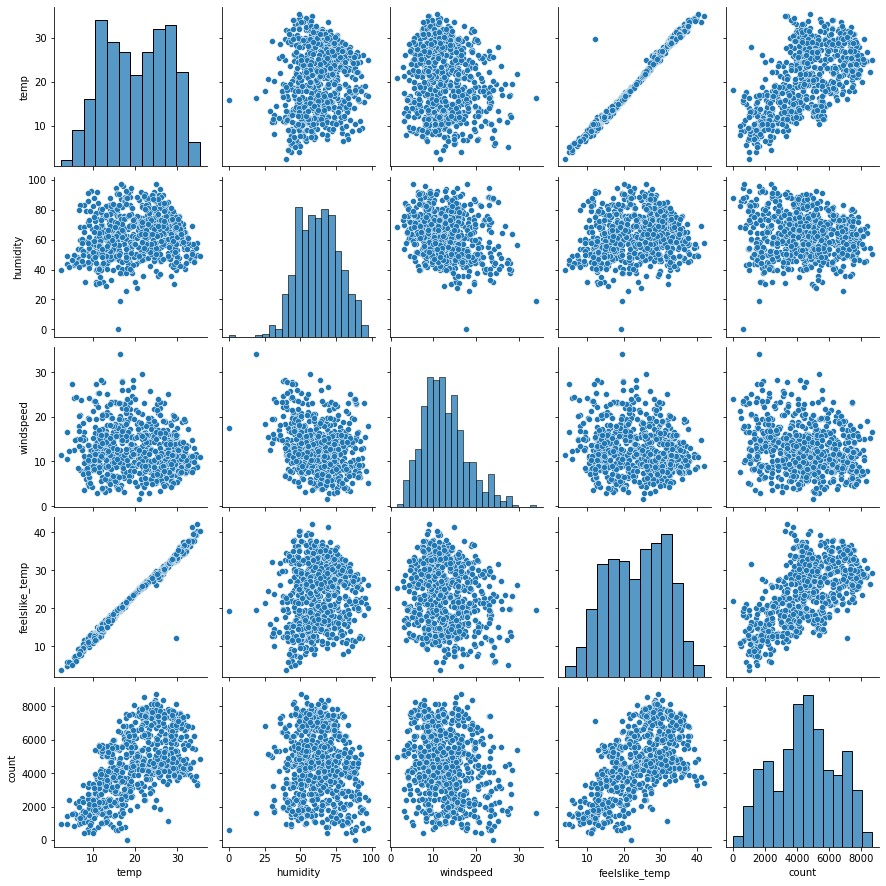

In [21]:
list_numeric = ['temp', 'humidity', 'windspeed', 'feelslike_temp', 'count']
sns.pairplot(bb_df[list_numeric])
plt.show()

<div class="alert alert-info">
    <b>Observations</b>
<br>- 'temp' and 'feelslike_temp' have a very strong collinear relationship. We will see if we can drop any of these. 
<br>- 'count' /demand of shared bikes definitely has some sort of relationship with 'temp'/ 'feelslike_temp'. Mostly, looks like linear.
<br>- demand of shared bikes were more with higher humidity
</div>

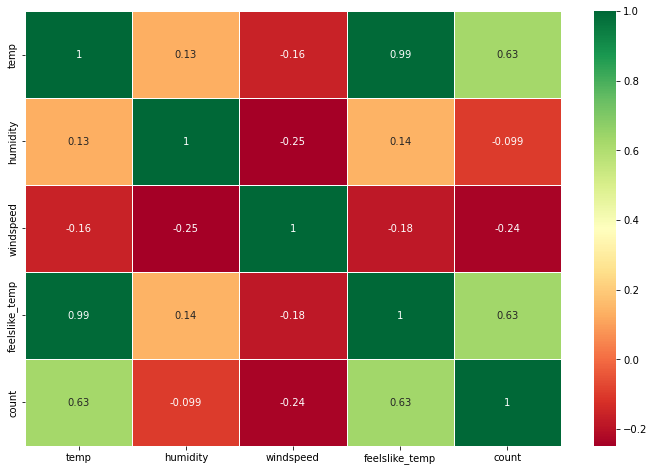

In [22]:
# Lets plot a correlation heat map for the continuous variables

plt.figure(figsize = (12,8))
ax= sns.heatmap(bb_df[list_numeric].corr(), annot = True, cmap="RdYlGn",linewidth =1)

Similar observation as with pair plots

#### 2. Visualising Categorical Variables

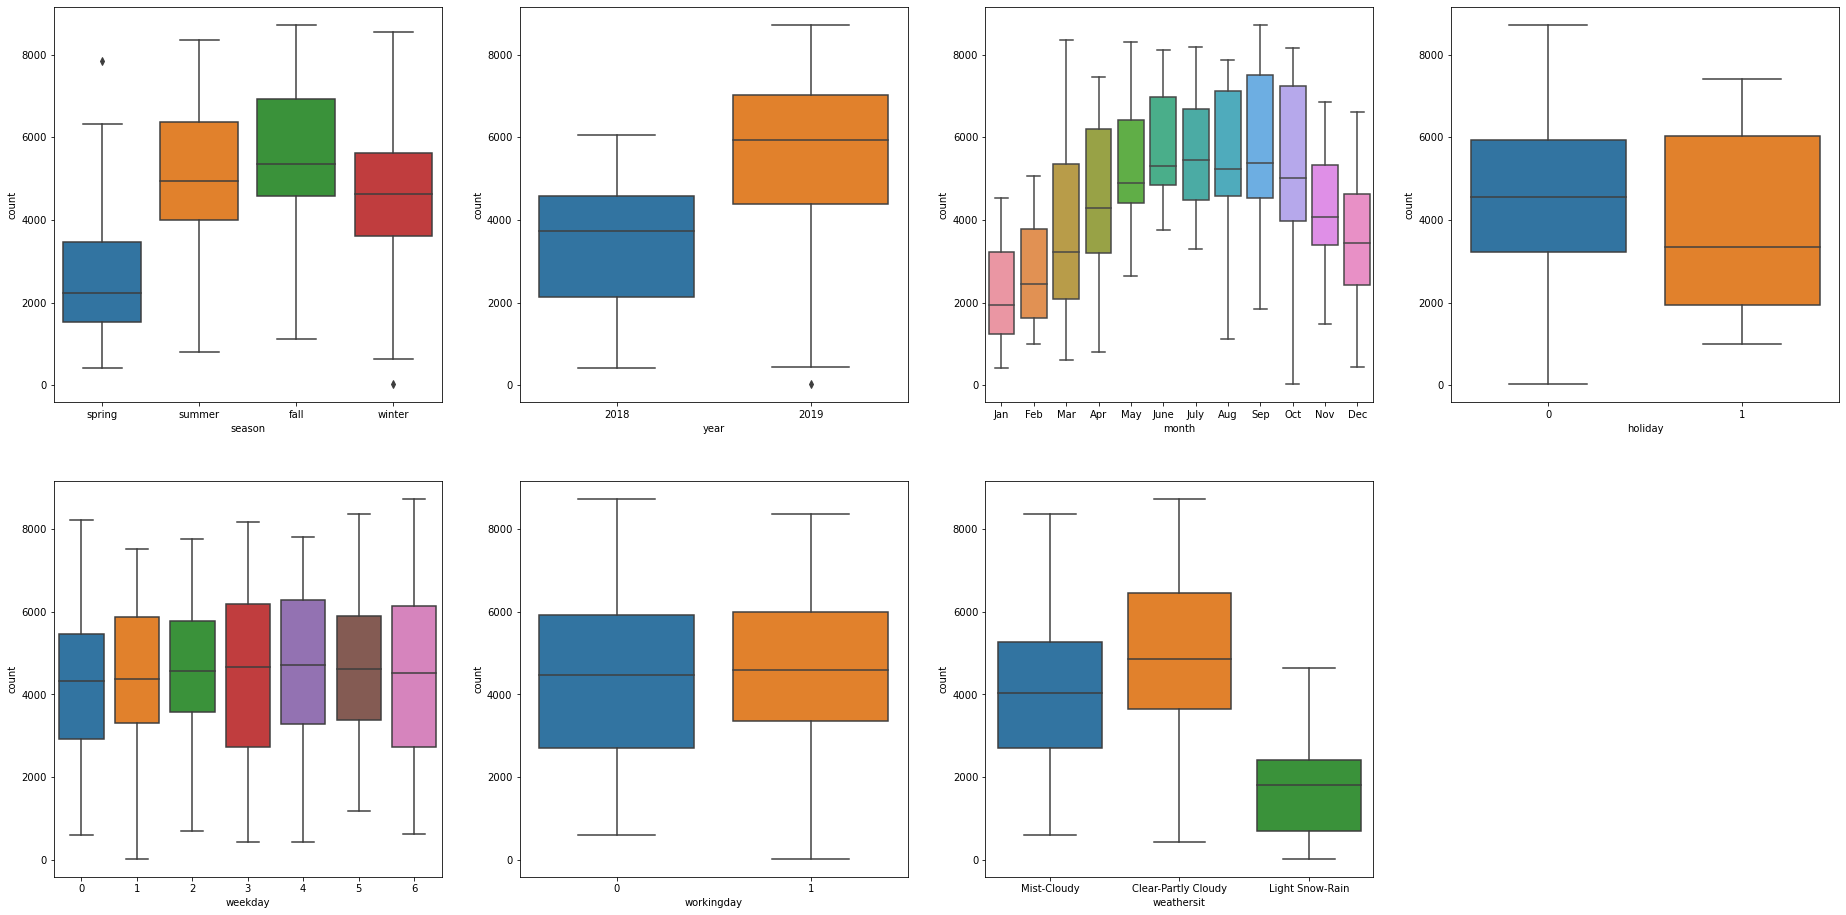

In [23]:
# plotting barplot for categorical variables
plt.figure(figsize=(32, 16))

plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'count', data = bb_df)
plt.subplot(2,4,2)
sns.boxplot(x = 'year', y = 'count', data = bb_df)
plt.subplot(2,4,3)
sns.boxplot(x = 'month', y = 'count', data = bb_df)
plt.subplot(2,4,4)
sns.boxplot(x = 'holiday', y = 'count', data = bb_df)
plt.subplot(2,4,5)
sns.boxplot(x = 'weekday', y = 'count', data = bb_df)
plt.subplot(2,4,6)
sns.boxplot(x = 'workingday', y = 'count', data = bb_df)
plt.subplot(2,4,7)
sns.boxplot(x = 'weathersit', y = 'count', data = bb_df)
plt.show()

<div class="alert alert-box alert-info">
<b>Observation:</b>
<ul>
    <li>Demand is dependent on season. High demand in Fall followed by Summer, probably due to favourable weather conditions and temprature.</li>
<li>Demand increased in 2019 as compared to 2018. More health awareness??</li>
<li>May to October months have high demand, as expected because the demand is high in Summer and Fall months</li>
<li>Demand is more of Non-Holidays. Probably people are using other mode of transport on the holidays. </li>
<li>No significant effect on count by weekday/workingday</li>
<li>'Clear, Few clouds, Partly cloudy' day has effect on the count. More rental in this weather condition.</li> 
<li>No rental on a 'Heavy Snow/Rain/Hail/Fog'day</li>
    </ul>
</div>

#### Detailed statistical analysis on the above variables

In [24]:
# function to analyze each categorical variable
# we will use this function for each cat variable
def stats_plots_for_categories(cat_variable):
    # Calculating percentage of booking against each respective category
    pv_categorical = bb_df.pivot_table(index = [cat_variable], values =['count'], aggfunc ='sum')
    pv_categorical['count %age'] = (pv_categorical['count']/pv_categorical['count'].sum())*100
    print(pv_categorical.sort_values('count %age', ascending= False))

    pv_categorical.plot(kind= 'bar')
    # Plot the 'count' for the selected categorical variable chosen
    plt.figure(figsize = (12,6))
    plt.subplot(1,2,1)
    sns.barplot(cat_variable,'count',data=bb_df)
    plt.subplot(1,2,2)
    sns.barplot(cat_variable,'count',data=bb_df, hue='year')
    plt.suptitle('Bike Rentals vs ' + cat_variable)
    plt.show()
    return

          count  count %age
season                     
fall    1061129   32.244879
summer   918589   27.913469
winter   841613   25.574374
spring   469514   14.267278


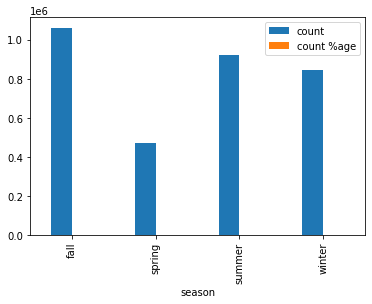

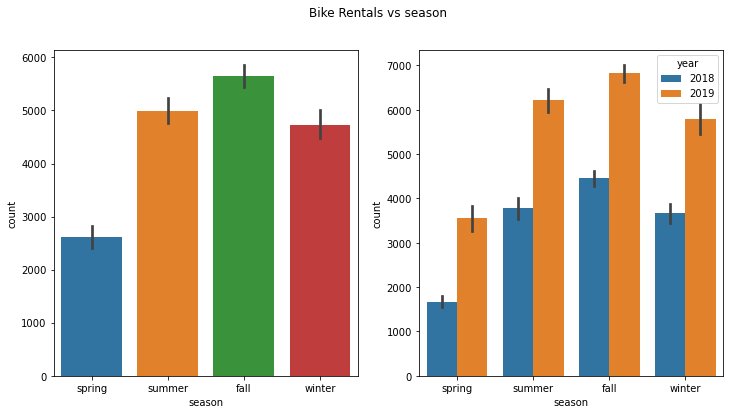

In [25]:
# season`
stats_plots_for_categories('season')

<div class="alert alert-info">
<b>Observation:</b><br>
- 32% bike bookings during fall season, 28% during summer<br>
- season could be a good predictor
</div>

        count  count %age
month                    
Aug    351194   10.671849
June   346342   10.524409
Sep    345991   10.513743
July   344948   10.482049
May    331686   10.079053
Oct    322352    9.795417
Apr    269094    8.177049
Nov    254831    7.743634
Mar    228920    6.956268
Dec    211036    6.412821
Feb    149518    4.543453
Jan    134933    4.100254


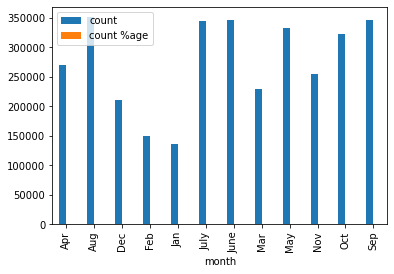

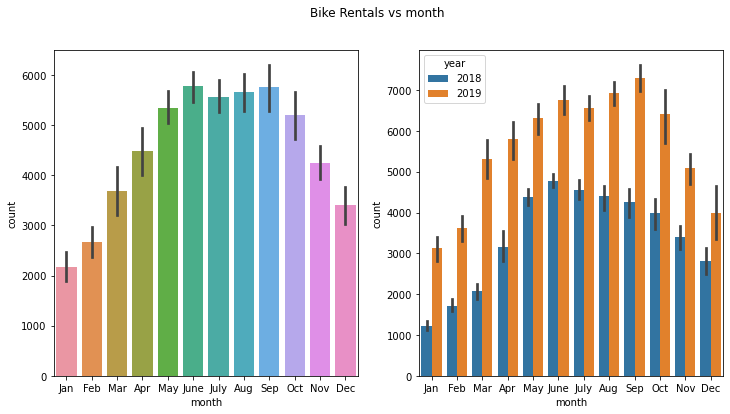

In [26]:
# month
stats_plots_for_categories('month')

<div class="alert alert-info">
    <b>Observation:</b><br>
- June-September months have higher number of bookings as compared to other months. Month could be a good predictor.
</div>

           count  count %age
holiday                     
0        3212410    97.61657
1          78435     2.38343


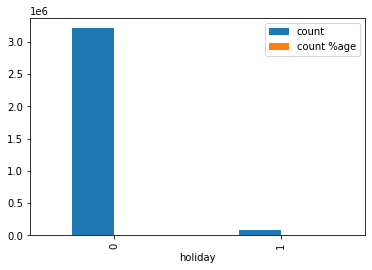

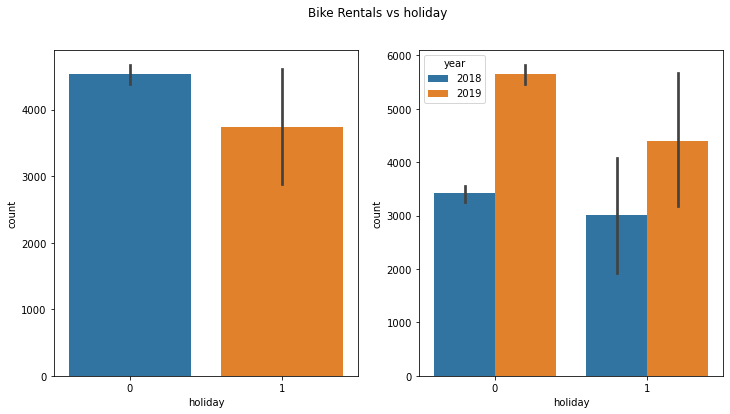

In [27]:
# holiday
stats_plots_for_categories('holiday')

<div class="alert alert-info">
    <b>Observations</b>
<br>- ~97.6% bikes were rented on a non-holiday. 'holiday' could be a good predictor variable as well.
</div>

          count  count %age
weekday                    
5        487790   14.822637
4        485395   14.749859
6        477807   14.519280
3        471214   14.318936
2        469109   14.254971
1        455503   13.841521
0        444027   13.492796


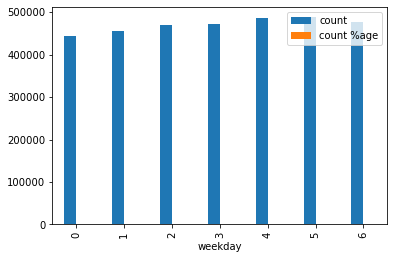

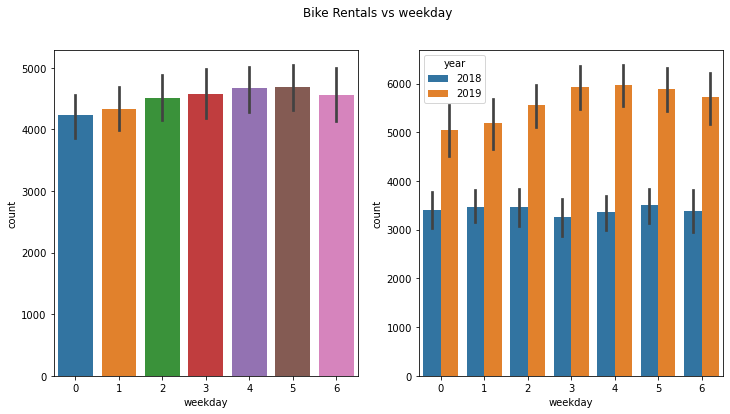

In [28]:
# weekday
stats_plots_for_categories('weekday')

<div class="alert alert-info">
    <b>Observations</b>
<br>- Almost similar distribution on all days, 'weekday' can't be a good predictor
 </div>

              count  count %age
workingday                     
1           2290576   69.604494
0           1000269   30.395506


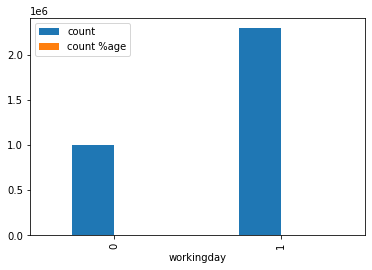

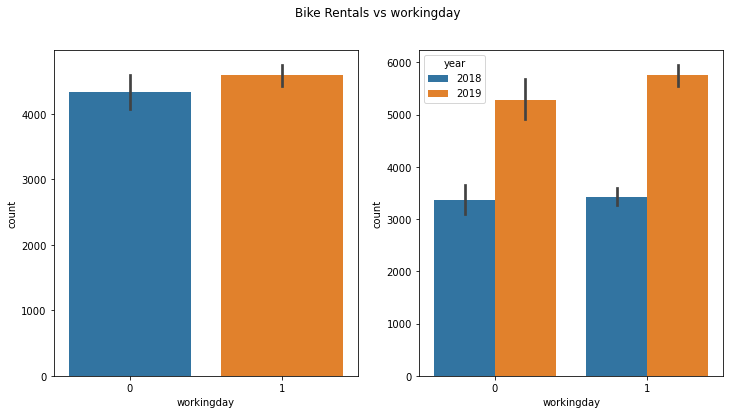

In [29]:
# workingday
stats_plots_for_categories('workingday')

<div class="alert alert-info">
    <b>Observations</b>
<br>- Around 70% bikes were rented on a working day, this could be a good predictor variable as well.
 </div>
 

                       count  count %age
weathersit                              
Clear-Partly Cloudy  2257952   68.613137
Mist-Cloudy           995024   30.236125
Light Snow-Rain        37869    1.150738


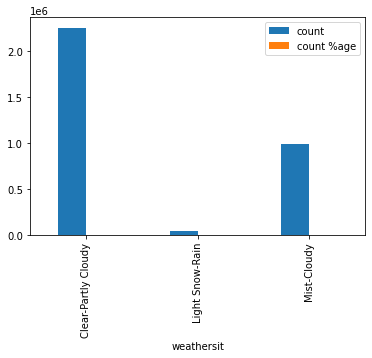

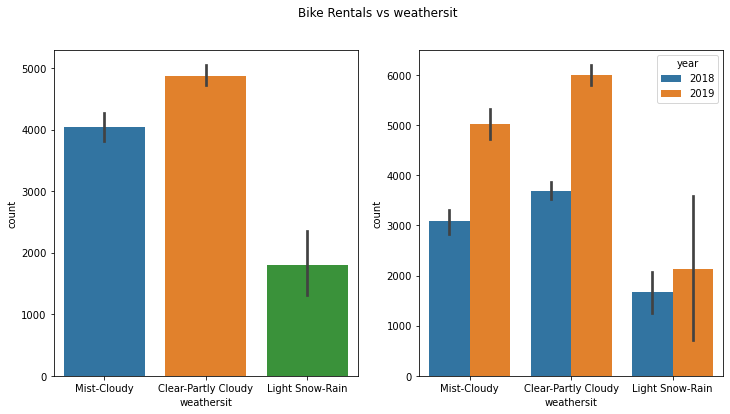

In [30]:
# weathersit
stats_plots_for_categories('weathersit')

<div class="alert alert-info">
    <b>Observations</b>
<br>- Most rent (around 69%) on 'Clear, Few clouds, Partly cloudy, Partly cloudy' days
<br>- No rental on a 'Heavy Snow/Rain/Hail/Fog'day
<br>- We can use this as predictor variable
 </div>

In [31]:
bb_df.shape

(730, 12)

## STEP 3: Data Preparation

#### Create Dummy Variables for Categorical Variables

In [32]:
cat_cols = ['season','month','weekday','weathersit']
bb_dummy = pd.get_dummies(data=bb_df,columns = cat_cols, drop_first=True)
bb_dummy.head()

,year,holiday,workingday,temp,feelslike_temp,humidity,windspeed,count,season_spring,season_summer,season_winter,month_Aug,month_Dec,month_Feb,month_Jan,month_July,month_June,month_Mar,month_May,month_Nov,month_Oct,month_Sep,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_Light Snow-Rain,weathersit_Mist-Cloudy
0,2018,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
1,2018,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,2018,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,2018,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,2018,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [33]:
bb_dummy.shape

(730, 30)

In [34]:
bb_dummy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   year                        730 non-null    object 
 1   holiday                     730 non-null    int64  
 2   workingday                  730 non-null    int64  
 3   temp                        730 non-null    float64
 4   feelslike_temp              730 non-null    float64
 5   humidity                    730 non-null    float64
 6   windspeed                   730 non-null    float64
 7   count                       730 non-null    int64  
 8   season_spring               730 non-null    uint8  
 9   season_summer               730 non-null    uint8  
 10  season_winter               730 non-null    uint8  
 11  month_Aug                   730 non-null    uint8  
 12  month_Dec                   730 non-null    uint8  
 13  month_Feb                   730 non

In [35]:
# All data looks good. Lets change 'year' column as well to 0 and 1 for model training
bb_dummy['year']=bb_df['year'].map({'2018': 0,'2019': 1})

In [36]:
bb_dummy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   year                        730 non-null    int64  
 1   holiday                     730 non-null    int64  
 2   workingday                  730 non-null    int64  
 3   temp                        730 non-null    float64
 4   feelslike_temp              730 non-null    float64
 5   humidity                    730 non-null    float64
 6   windspeed                   730 non-null    float64
 7   count                       730 non-null    int64  
 8   season_spring               730 non-null    uint8  
 9   season_summer               730 non-null    uint8  
 10  season_winter               730 non-null    uint8  
 11  month_Aug                   730 non-null    uint8  
 12  month_Dec                   730 non-null    uint8  
 13  month_Feb                   730 non

All numeric fields now

## STEP 4: Splitting the Data into Training and Testing Sets

In [37]:
# Split the dataset into train and test 70:30
np.random.seed(0)
bb_train, bb_test = train_test_split(
    bb_dummy, train_size = 0.7, test_size = 0.3, random_state = 100)

In [38]:
# checking shape of train and test data
bb_train.shape

(510, 30)

In [39]:
bb_test.shape

(219, 30)

<b>Rescaling the features using Min-Max scaling</b>

In [40]:
scaler = MinMaxScaler()

# Apply scaler() to all nominal variable

bb_train[list_numeric] = scaler.fit_transform(bb_train[list_numeric])
bb_train.head()

,year,holiday,workingday,temp,feelslike_temp,humidity,windspeed,count,season_spring,season_summer,season_winter,month_Aug,month_Dec,month_Feb,month_Jan,month_July,month_June,month_Mar,month_May,month_Nov,month_Oct,month_Sep,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_Light Snow-Rain,weathersit_Mist-Cloudy
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1


In [41]:
# checking after scaling is applied
bb_train.describe()

,year,holiday,workingday,temp,feelslike_temp,humidity,windspeed,count,season_spring,season_summer,season_winter,month_Aug,month_Dec,month_Feb,month_Jan,month_July,month_June,month_Mar,month_May,month_Nov,month_Oct,month_Sep,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_Light Snow-Rain,weathersit_Mist-Cloudy
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,0.096078,0.084314,0.066667,0.088235,0.076471,0.074510,0.098039,0.084314,0.086275,0.086275,0.080392,0.150980,0.131373,0.158824,0.133333,0.127451,0.154902,0.029412,0.343137
std,0.500429,0.157763,0.468282,0.225844,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,0.294988,0.278131,0.249689,0.283915,0.266010,0.262857,0.297660,0.278131,0.281045,0.281045,0.272166,0.358381,0.338139,0.365870,0.340268,0.333805,0.362166,0.169124,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<b>Looks good. Min-Max scaling applied</b>

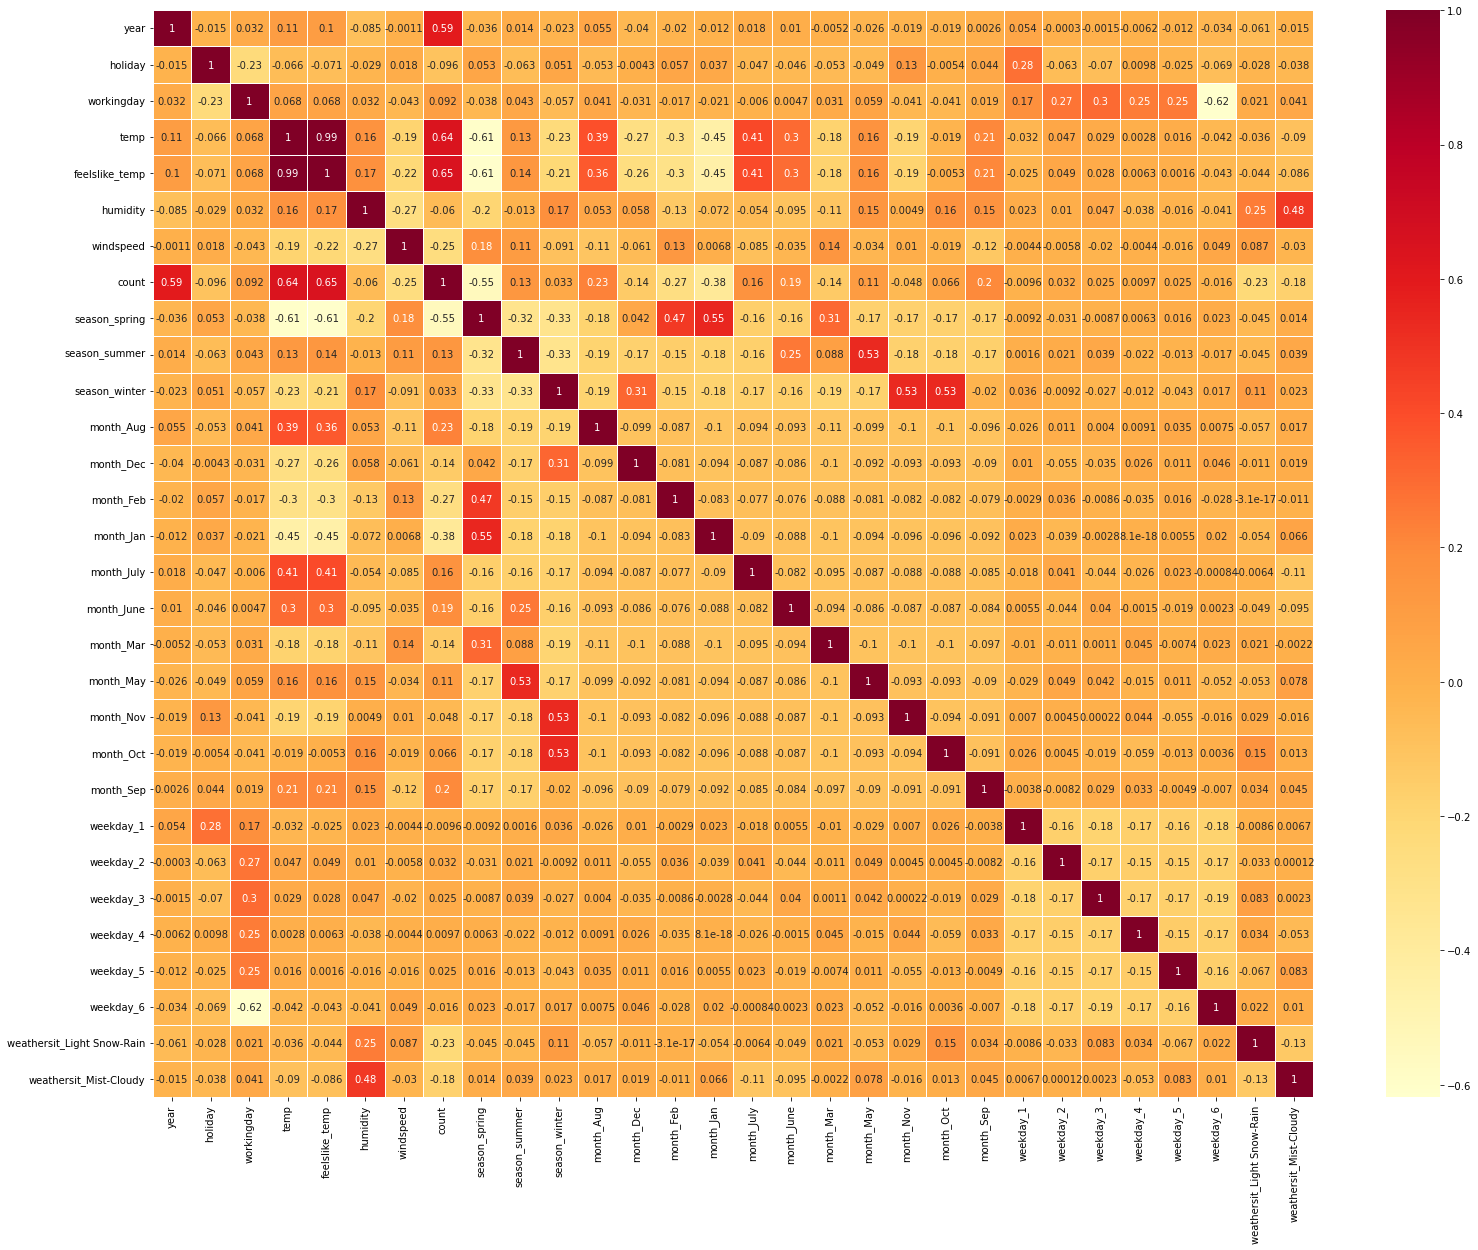

In [42]:
# Check correlation coefficients to see variables correlation
plt.figure(figsize = (26, 20))
sns.heatmap(bb_train.corr(), annot = True, cmap="YlOrRd", linewidth=1)
plt.show()

<div class="alert alert-info">
    <b>Observations:</b>
<br>- temp and feelslike_temp are 99% correlated, we can use either of these for our prediction.
<br>- temp and year have good correlation with count.
<br>- count has a negative correlation with spring season, windspeed and with some months
<br>- season and corresponding months have some correlation which is quite understandable
<br>- workingday has negative correlation with weekday 6 (which is Monday as per the data set) 
<br>- misty weather and humidity have 48% correlation
</div>

### Dividing into X and Y sets for the model building

In [43]:
# Get count on y axis
y_train = bb_train.pop('count')
X_train = bb_train

## STEP 5: Building a Linear Model

### RFE

#### Recursive Feature Elimination using SciKitLearn

In [44]:
# Lets first use RFE to bring down the predictor variables to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)
rfe = rfe.fit(X_train, y_train)

In [45]:
# Check the ranking of predictor vaiables after running RFE
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('feelslike_temp', False, 5),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('month_Aug', False, 7),
 ('month_Dec', False, 3),
 ('month_Feb', False, 4),
 ('month_Jan', True, 1),
 ('month_July', True, 1),
 ('month_June', False, 13),
 ('month_Mar', False, 15),
 ('month_May', False, 6),
 ('month_Nov', False, 2),
 ('month_Oct', False, 11),
 ('month_Sep', True, 1),
 ('weekday_1', False, 8),
 ('weekday_2', False, 9),
 ('weekday_3', False, 12),
 ('weekday_4', False, 14),
 ('weekday_5', False, 10),
 ('weekday_6', True, 1),
 ('weathersit_Light Snow-Rain', True, 1),
 ('weathersit_Mist-Cloudy', True, 1)]

In [46]:
# list of top 15 predictor variables after running RFE
predictors =  X_train.columns[rfe.support_]
predictors

Index(['year', 'holiday', 'workingday', 'temp', 'humidity', 'windspeed', 'season_spring', 'season_summer', 'season_winter', 'month_Jan', 'month_July', 'month_Sep', 'weekday_6', 'weathersit_Light Snow-Rain', 'weathersit_Mist-Cloudy'], dtype='object')

In [47]:
# Lets also see the non-selected columns incase we may miss out any important for business
X_train.columns[~rfe.support_]

Index(['feelslike_temp', 'month_Aug', 'month_Dec', 'month_Feb', 'month_June', 'month_Mar', 'month_May', 'month_Nov', 'month_Oct', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5'], dtype='object')

<div class="alert alert-info">
    <b>Observation</b><br>
- All looks good based on our previous conclusions during EDA
</div>

In [48]:
# Creating X_train dataframe with RFE selected predictors
X_train_rfe = X_train[predictors]

#### Model 1

In [49]:
# We will use statsmodel for detailed  statistical inferences

# Adding constant
X_train_lm1 = sm.add_constant(X_train_rfe)

# building first fitted model
lm_1 = sm.OLS(y_train, X_train_lm1).fit()

# summary statistics of model obtained
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.6
Date:                Wed, 11 May 2022   Prob (F-statistic):          2.31e-191
Time:                        20:43:57   Log-Likelihood:                 519.88
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     494   BIC:                            -940.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

<div class="alert alert-info">
    <b>Observation</b>
<br>'month_Jan', and 'holiday' have higher p-value, don't look significant. We will check the VIF first.
 </div>

#### Checking VIF

Variance Inflation Factor(VIF) is used to get a quantitative idea about the correlation among the variables.

In [50]:

# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Function to calculate VIF
def get_VIF(X_train_df):
    vif = pd.DataFrame()
    vif['Features'] = X_train_df.columns
    vif['VIF'] = [variance_inflation_factor(X_train_df.values, i) for i in range(X_train_df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [51]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
get_VIF(X_train_rfe)

,Features,VIF
4,humidity,29.40
3,temp,17.77
2,workingday,5.31
5,windspeed,4.73
6,season_spring,4.53
8,season_winter,3.48
7,season_summer,2.84
14,weathersit_Mist-Cloudy,2.29
0,year,2.09
12,weekday_6,1.98


<div class="alert alert-info">
    <b>Observation</b>
<br>humidity has very high VIF, we can safely drop this.
 </div>

#### Model 2

In [52]:
# Dropping highly correlated variable 'humidity'
X_train2 = X_train_rfe.drop('humidity', 1)

# Adding constant
X_train_lm2 = sm.add_constant(X_train2)

# building second fitted model
lm_2 = sm.OLS(y_train, X_train_lm2).fit()

# summary statistics of model obtained
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.3
Date:                Wed, 11 May 2022   Prob (F-statistic):          7.33e-189
Time:                        20:43:58   Log-Likelihood:                 511.16
No. Observations:                 510   AIC:                            -992.3
Df Residuals:                     495   BIC:                            -928.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

<div class="alert alert-info">
    <b>Observation</b>
<br>holiday has high p-value, check VIF
 </div>

In [53]:
# Lets see VIF values
get_VIF(X_train2)

,Features,VIF
3,temp,7.07
2,workingday,5.24
4,windspeed,4.67
5,season_spring,3.08
6,season_summer,2.33
0,year,2.08
7,season_winter,1.99
11,weekday_6,1.97
8,month_Jan,1.62
9,month_July,1.59


<div class="alert alert-info">
    <b>Observations</b>
<br>- VIF for temp has come down but it is still high. Since it has high correlation with count, we are not dropping it.
<br>- Drop holiday having high p-value
 </div>

#### Model 3

In [54]:
# Dropping insignificant variable 'holiday'
X_train3 = X_train2.drop('holiday', 1)

# Adding constant
X_train_lm3 = sm.add_constant(X_train3)

# building third fitted model
lm_3 = sm.OLS(y_train, X_train_lm3).fit()

# summary statistics of model obtained
print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     203.3
Date:                Wed, 11 May 2022   Prob (F-statistic):          4.11e-189
Time:                        20:43:58   Log-Likelihood:                 508.99
No. Observations:                 510   AIC:                            -990.0
Df Residuals:                     496   BIC:                            -930.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [55]:
# Lets see VIF values
get_VIF(X_train3)

,Features,VIF
2,temp,6.82
1,workingday,4.68
3,windspeed,4.66
4,season_spring,2.99
5,season_summer,2.31
0,year,2.08
6,season_winter,1.92
10,weekday_6,1.84
7,month_Jan,1.62
8,month_July,1.59


<div class="alert alert-info">
    <b>Observation</b>
<br>- Lets drop 'month_Jan' (high p-value) and then check VIF again. 
 </div>

#### Model 4

In [56]:
# Dropping insignificant variable 'month_Jan'
X_train4 = X_train3.drop('month_Jan', 1)

# Adding constant
X_train_lm4 = sm.add_constant(X_train4)

# building fourth fitted model
lm_4 = sm.OLS(y_train, X_train_lm4).fit()

# summary statistics of model obtained
print(lm_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     218.1
Date:                Wed, 11 May 2022   Prob (F-statistic):          3.28e-189
Time:                        20:43:58   Log-Likelihood:                 506.42
No. Observations:                 510   AIC:                            -986.8
Df Residuals:                     497   BIC:                            -931.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [57]:
# Lets see VIF values
get_VIF(X_train4)

,Features,VIF
2,temp,6.73
1,workingday,4.65
3,windspeed,4.64
4,season_spring,2.38
5,season_summer,2.31
0,year,2.07
6,season_winter,1.92
9,weekday_6,1.83
7,month_July,1.58
11,weathersit_Mist-Cloudy,1.56


<div class="alert alert-info">
    <b>Observation</b>
<br>- Month_July p-value is high compared to others, let's drop this as well.
<br>- Rsquare and adjusted Rsquare look good    
 </div>

#### Model 5

In [58]:
# Dropping insignificant variable 'month_July'
X_train5 = X_train4.drop('month_July', 1)

# Adding constant
X_train_lm5 = sm.add_constant(X_train5)

# building fifth fitted model
lm_5 = sm.OLS(y_train, X_train_lm5).fit()

# summary statistics of model obtained
print(lm_5.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     234.4
Date:                Wed, 11 May 2022   Prob (F-statistic):          6.86e-189
Time:                        20:43:58   Log-Likelihood:                 502.83
No. Observations:                 510   AIC:                            -981.7
Df Residuals:                     498   BIC:                            -930.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [59]:
# Lets see VIF values
get_VIF(X_train5)

,Features,VIF
2,temp,5.48
1,workingday,4.65
3,windspeed,4.63
4,season_spring,2.30
0,year,2.07
5,season_summer,1.99
8,weekday_6,1.83
6,season_winter,1.77
10,weathersit_Mist-Cloudy,1.56
7,month_Sep,1.23


<div class="alert alert-info">
    <b>Observation</b>
<br>- lets drop 'season_spring' as it has higher p-value than the others features and then check VIF for 'temp'
 </div>

#### Model 6

In [60]:
# Dropping insignificant variable 'season_spring'
X_train6 = X_train5.drop('season_spring', 1)

# Adding constant
X_train_lm6 = sm.add_constant(X_train6)

# building sixth fitted model
lm_6 = sm.OLS(y_train, X_train_lm6).fit()

# summary statistics of model obtained
print(lm_6.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     254.0
Date:                Wed, 11 May 2022   Prob (F-statistic):          1.47e-188
Time:                        20:43:58   Log-Likelihood:                 499.18
No. Observations:                 510   AIC:                            -976.4
Df Residuals:                     499   BIC:                            -929.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [61]:
# Lets see VIF values
get_VIF(X_train6)

,Features,VIF
2,temp,4.76
1,workingday,4.04
3,windspeed,3.43
0,year,2.02
7,weekday_6,1.69
4,season_summer,1.57
9,weathersit_Mist-Cloudy,1.53
5,season_winter,1.40
6,month_Sep,1.20
8,weathersit_Light Snow-Rain,1.08


<div class="alert alert-info">
    <b>Observation</b>
<br>- p-value for all features are zero now
<br>- 'temp' has still high IF but below 5
<br>- Prob(Omnibus) is 0.000 which indicate normalcy
<br>- R-squared and adjusted R-squared are around 83% which is preety good.   
<br>
 <hr>
Since 'temp' and 'workingday' have an effect on the 'count', we will now check by dropping 'temp' feature and see it's effect on the model.
 </div>

#### Model 7

In [62]:
# Dropping variable 'temp'
X_train7 = X_train6.drop('temp', 1)

# Adding constant
X_train_lm7 = sm.add_constant(X_train7)

# building seventh fitted model
lm_7 = sm.OLS(y_train, X_train_lm7).fit()

# summary statistics of model obtained
print(lm_7.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.580
Model:                            OLS   Adj. R-squared:                  0.572
Method:                 Least Squares   F-statistic:                     76.68
Date:                Wed, 11 May 2022   Prob (F-statistic):           2.30e-88
Time:                        20:43:58   Log-Likelihood:                 259.65
No. Observations:                 510   AIC:                            -499.3
Df Residuals:                     500   BIC:                            -456.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [63]:
# Lets see VIF values
get_VIF(X_train7)

,Features,VIF
2,windspeed,3.25
1,workingday,3.14
0,year,1.88
8,weathersit_Mist-Cloudy,1.53
6,weekday_6,1.52
3,season_summer,1.50
4,season_winter,1.40
5,month_Sep,1.11
7,weathersit_Light Snow-Rain,1.08



<div class="alert alert-info">
    <b>Observations:</b>
<br>- R-squared and adjusted R-squared have come down significantly
<br>- Prob(Omnibus) has increased from the previous model as well. 
<br>
<hr>
    <b>The previous model 6 (lm_6) has p-value and VIF for all features within acceptable range and it looks a good fit. We will use this model for our analysis.</b>

In [64]:
# List down final model varibales and its coefficients

# assign final model to lm_final
lm_final = lm_6
# list down and check variables of final model
var_final = list(lm_final.params.index)
var_final.remove('const')
print('Final Selected Variables:', var_final)

# Print the coefficents of final varible
print('\033[1m{:10s}\033[0m'.format('\nCoefficent for the variables are:'))
print(round(lm_final.params,4))

Final Selected Variables: ['year', 'workingday', 'temp', 'windspeed', 'season_summer', 'season_winter', 'month_Sep', 'weekday_6', 'weathersit_Light Snow-Rain', 'weathersit_Mist-Cloudy']

Coefficent for the variables are:
const                         0.0753
year                          0.2331
workingday                    0.0563
temp                          0.5499
windspeed                    -0.1552
season_summer                 0.0874
season_winter                 0.1318
month_Sep                     0.0972
weekday_6                     0.0677
weathersit_Light Snow-Rain   -0.2880
weathersit_Mist-Cloudy       -0.0813
dtype: float64


<div class="alert alert-block alert-info">
            <b>Observation: </b><br> All coefficients are non-zero in the final model "lm_final". 
            <br>
    <b>Conclusion:</b> <br>Null Hypothesis is rejected.
</div>


### Linear Relationship check

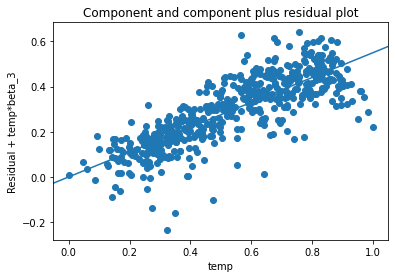

In [65]:
# Check that the Linearity assumption is preserved between count and temp.
sm.graphics.plot_ccpr(lm_final, 'temp')
plt.show()

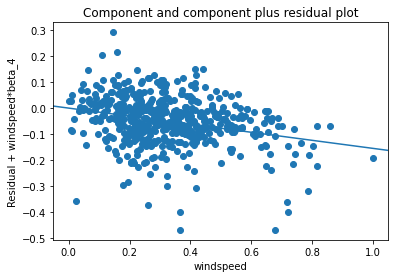

In [66]:
# Lets see that the Linearity assumption is preserved between count and windspeed.
sm.graphics.plot_ccpr(lm_final, 'windspeed')
plt.show()

<div class="alert alert-block alert-info">
            <b>Observation: </b><br>Linearity is well-preserved for both temp and windspeed features.
</div>

### Multicollinearity check

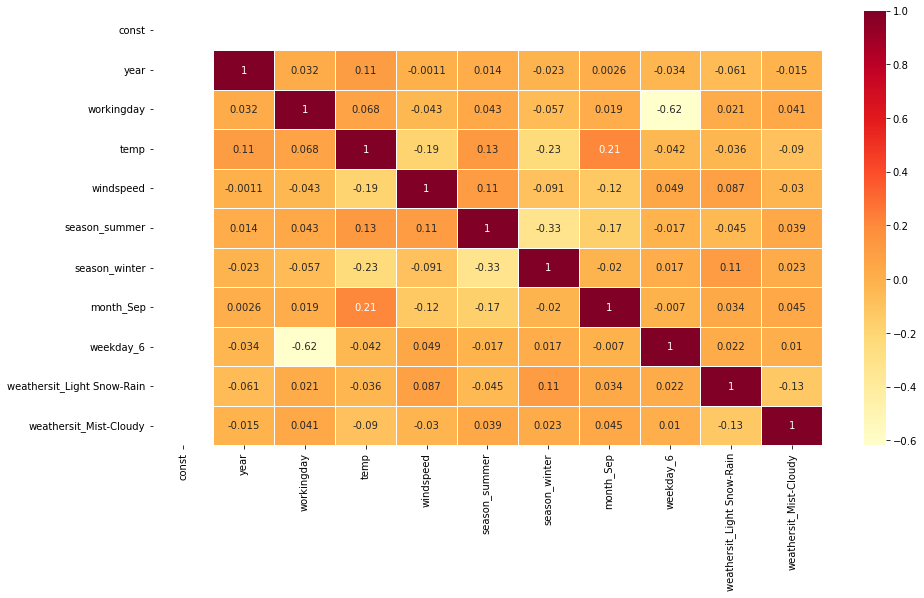

In [67]:
# Plotting heat map to check multicollinearity between predictor variables
plt.figure(figsize=(15,8))
sns.heatmap(X_train_lm6.corr(),annot = True, cmap="YlOrRd",linewidth =1)
plt.show()

<div class="alert alert-block alert-info">
            <b>Observation: </b><br>No or negligible Multicollinearity observed.
</div>

## STEP 6: Residual Analysis of the Training data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

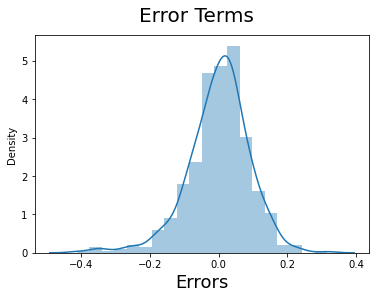

In [68]:
# y predicted
y_train_pred = lm_final.predict(X_train_lm6)

# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
# Plot heading 
fig.suptitle('Error Terms', fontsize = 20)   
# X-label
plt.xlabel('Errors', fontsize = 18)                         
plt.show()

<div class="alert alert-block alert-info">
            <b>Observation: </b><br>Normal distribution of error terms, around mean 0
</div>

### Test for Homoscedasticity

An assumption of linear regression is homoscedasticity. Homoscedasticity in a model means that the error is constant along the values of the dependent variable.

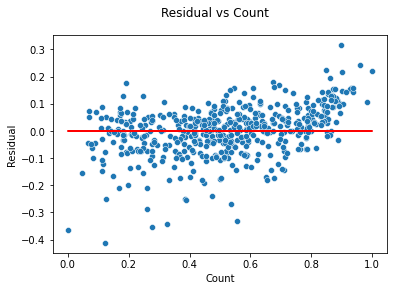

In [69]:
# plotting residual vs count scatter plot
residual = y_train - y_train_pred
sns.scatterplot(y_train,residual)
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.suptitle('Residual vs Count')
plt.show()

<div class="alert alert-block alert-info">
            <b>Observation: </b><br>Constant deviation of points from the zero line, Homoscedasticity is well preserved
</div>

## STEP 7: Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. sixth model.

#### Applying the scaling on the test sets

In [70]:
bb_test[list_numeric] = scaler.transform(bb_test[list_numeric])
bb_test.head()

,year,holiday,workingday,temp,feelslike_temp,humidity,windspeed,count,season_spring,season_summer,season_winter,month_Aug,month_Dec,month_Feb,month_Jan,month_July,month_June,month_Mar,month_May,month_Nov,month_Oct,month_Sep,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_Light Snow-Rain,weathersit_Mist-Cloudy
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0


In [71]:
# checking the data
bb_test.describe()

,year,holiday,workingday,temp,feelslike_temp,humidity,windspeed,count,season_spring,season_summer,season_winter,month_Aug,month_Dec,month_Feb,month_Jan,month_July,month_June,month_Mar,month_May,month_Nov,month_Oct,month_Sep,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_Light Snow-Rain,weathersit_Mist-Cloudy
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.558941,0.532991,0.638508,0.313350,0.520592,0.255708,0.264840,0.232877,0.059361,0.086758,0.100457,0.077626,0.105023,0.095890,0.054795,0.086758,0.073059,0.082192,0.086758,0.127854,0.164384,0.100457,0.164384,0.178082,0.118721,0.027397,0.319635
std,0.500722,0.188034,0.459904,0.233698,0.217888,0.148974,0.159947,0.218435,0.437258,0.442259,0.423633,0.236840,0.282125,0.301297,0.268194,0.307285,0.295115,0.228100,0.282125,0.260830,0.275286,0.282125,0.334692,0.371472,0.301297,0.371472,0.383458,0.324202,0.163612,0.467403
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.377531,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.524275,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.714132,0.743928,0.403048,0.672745,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [72]:
# Dividing into X_test and y_test dataframes
y_test = bb_test.pop('count')
X_test = bb_test

# Adding constant variable to test dataframe
X_test_m6 = sm.add_constant(X_test)

# Dropping variables from X_test_m6
X_test_m6 = X_test_m6[X_train_lm6.columns]

# Making predictions using the seventh model
y_pred_m6 = lm_final.predict(X_test_m6)

## STEP 8: Model Evaluation

### Lets check R-squared and Adjusted R-squared for Test Data

In [73]:
# R-square for test
from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_pred_m6)
print(r2)

# n is number of rows in test dataset
n = X_test_m6.shape[0]

# Number of features (predictors, p) is the shape along axis 1
p = X_test_m6.shape[1]

# We find the Adjusted R-squared using the formula
adjusted_r2 = round(1-(1-r2)*(n-1)/(n-p-1),4)
print(adjusted_r2)

0.7955844377237249
0.7847


**Let's now plot the graph for actual versus predicted values.**

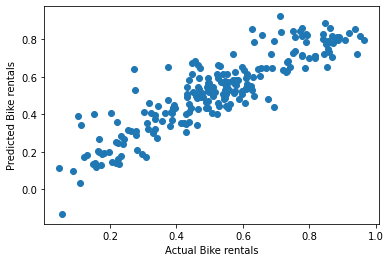

In [74]:
# Plotting y_test and y_pred_m6 to understand the spread
fig = plt.figure()
plt.scatter(y_test, y_pred_m6)
#fig.suptitle('Bike rentals Predicted v/s Actuals on Test Dataset')        # Plot heading 
plt.xlabel('Actual Bike rentals')                                         # X-label
plt.ylabel('Predicted Bike rentals')  
plt.show()

<div class="alert alert-block alert-info">
            <b>Observation: </b><br>Actual vs Predicted points are quite close to each other. 
</div>

<div class="alert alert-block alert-success">
<h3>Summary:</h3><br>
    <b>Top 3 variables/features affecting the bile rental are:</b>
<ul>
    <li><b>'temp'</b> with the coefficient of 0.5499</li>
    <li>"<b>'weathersit'</b> = 3 => Light Snow/Rain" with the coefficient of -0.2880</li>
    <li><b>'yr (year)'</b> with a coefficient of 0.2331</li>
</ul>
 
<h3>Train vs Test Metrics Comparison:</h3><br>
<ul>
    <li>Training R-squared : 0.836</li>
<li>Training Adjusted R-squared : 0.832</li>
<li>Test R-squared: 0.796</li>
<li>Test Adjusted R-squared: 0.785</li>
<li>Difference in R-squared between Training and Test dataset: 4%</li>
<li>Difference in adjusted R-squared between Training and test:4.7% (<5%)</li>
</ul>
    
<h3>Final equation for the best fitted line is:</h3><br>
<hr>    
$ count = 0.5499  \times  temp + 0.2331  \times  year + 0.1318  \times  season\_winter + 0.0972  \times  month\_Sep + 0.0874  \times  season\_summer + 0.0677  \times  weekday\_6 + 0.0563  \times  workingday - 0.2880  \times  weathersit\_Light Snow/Rain - 0.1552  \times  windspeed - 0.0813  \times  weathersit\_Mist/Cloudy + 0.0753 $
</div>